LINEAR REGRESION 


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

#Cargar el conjunto de datos
datos = pd.read_csv('insurance.csv')
X = datos[['age']].values  # Usando 'edad' como variable independiente
y = datos['charges'].values  # Variable dependiente que es la prima del seguro

In [35]:
# ## Normalización de los datos
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

In [36]:
# ## Inicializar parámetros
w, b = 0, 0  # Pesos y sesgo iniciales
learning_rate = 0.0002
epochs = 100
n = len(X)

In [37]:
# ## Historial de pérdida
historial_perdida_mse = []
historial_perdida_r2 = []
historial_perdida_mae = []

In [38]:
# ## Descenso de gradiente
for epoch in range(epochs):
    # Predicciones
    y_predicho = w * X + b
    
    # Calcular funciones de pérdida
    perdida_mse = np.mean((y - y_predicho) ** 2)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_predicho) ** 2)
    perdida_r2 = 1 - (ss_residual / ss_total) if ss_total != 0 else 0
    perdida_mae = np.mean(np.abs(y - y_predicho))
    
    # Guardar en historial
    historial_perdida_mse.append(perdida_mse)
    historial_perdida_r2.append(perdida_r2)
    historial_perdida_mae.append(perdida_mae)
    
    # Calcular gradientes
    dw = -(2/n) * np.sum((y - y_predicho) * X)
    db = -(2/n) * np.sum(y - y_predicho)
    
    # Actualizar pesos y sesgo
    w -= learning_rate * dw
    b -= learning_rate * db

# ## Imprimir parámetros finales
print(f'Peso final: {w:.4f}, Sesgo final: {b:.4f}')

Peso final: 0.0000, Sesgo final: -0.0000


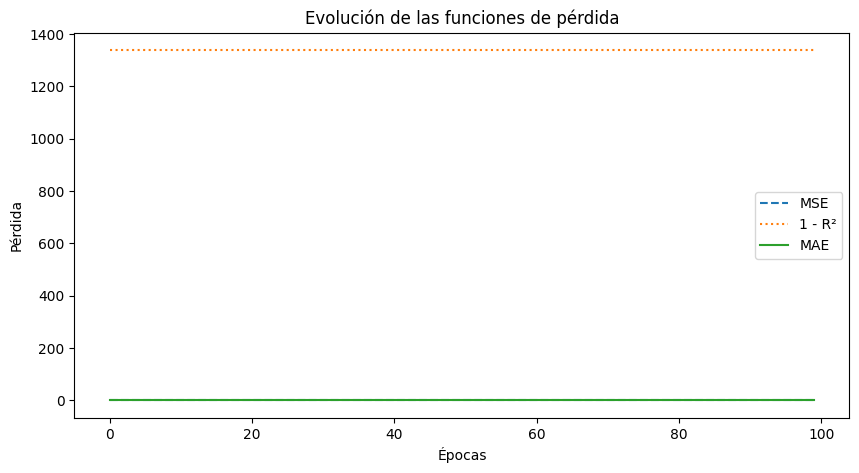

In [39]:
# ## Graficar la pérdida
plt.figure(figsize=(10, 5))
plt.plot(historial_perdida_mse, label='MSE', linestyle='dashed')
plt.plot([1 - r2 for r2 in historial_perdida_r2], label='1 - R²', linestyle='dotted')
plt.plot(historial_perdida_mae, label='MAE', linestyle='solid')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de las funciones de pérdida')
plt.legend()
plt.show()

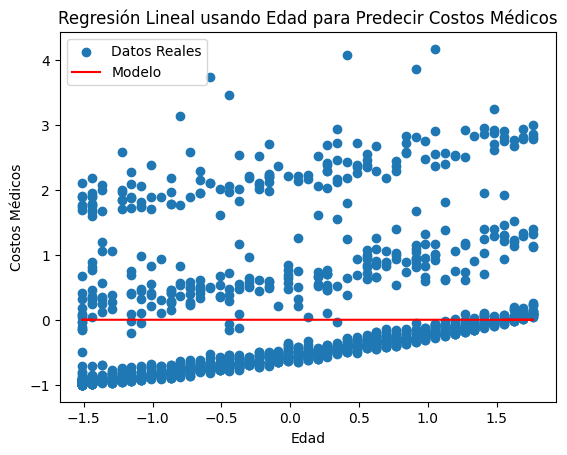

In [40]:
# ## Graficar la línea de regresión
plt.scatter(X, y, label='Datos Reales')
plt.plot(X, w * X + b, color='red', label='Modelo')
plt.xlabel('Edad')
plt.ylabel('Costos Médicos')
plt.legend()
plt.title('Regresión Lineal usando Edad para Predecir Costos Médicos')
plt.show()
